In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.utils.random import sample_without_replacement
from sklearn.utils import resample
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score

In [2]:
data=pd.read_csv('full_clothing.csv')

In [3]:
data=data[['Category','Description']]

In [4]:
data['Category'].value_counts().plot(kind="bar")

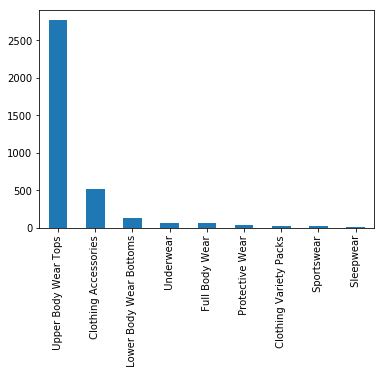

In [5]:
plt.show()

In [6]:
# get a balanced data set
# becasue the smallest category just have 10 description, we just do that with replacement. 
# we have another file to do that, so right now we just import the balanced data set
balanced_data=pd.read_csv('balanced.csv')


In [7]:
balanced_data=balanced_data[['Category','Description']]

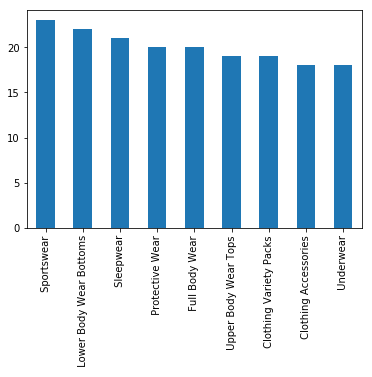

In [8]:
balanced_data['Category'].value_counts().plot(kind="bar")
plt.show()

In [9]:
balanced_data

,Category,Description
0,Upper Body Wear Tops,Cheer on your Florida State Seminoles in this ...
1,Upper Body Wear Tops,Celebrate your Baltimore Ravens fandom during ...
2,Upper Body Wear Tops,A fau sheepskin bat sleeve Dolman top in a cre...
3,Upper Body Wear Tops,Dont let a cold snap keep you from supporting ...
4,Upper Body Wear Tops,The time has come for the Atlantic 10 Conferen...
5,Upper Body Wear Tops,Celebrate your fandom with this Miami Hurrican...
6,Upper Body Wear Tops,Cheer on your Rutgers Scarlet Knights in this ...
7,Upper Body Wear Tops,Celebrate your Florida Gators fandom with this...
8,Upper Body Wear Tops,Celebrate your Maryland Terrapins fandom with ...
9,Upper Body Wear Tops,When the season changes the nights get longer ...


In [10]:
X_train, X_test, y_train, y_test = train_test_split(balanced_data['Description'],balanced_data['Category'], test_size=0.33, random_state=42)

In [11]:
vectorizer = TfidfVectorizer(stop_words='english')
vectorizer.fit(X_train)
print(vectorizer.vocabulary_)
x= vectorizer.transform(X_train)
clf = RandomForestClassifier(n_estimators=2200)
clf.fit(x,y_train)
x_test=vectorizer.transform(X_test)
y_predict=clf.predict(x_test)
f1_score(y_test,y_predict,average='weighted')

{'section': 658, 'shield': 667, 'summer': 750, 'scarlet': 649, 'miami': 491, 'boyleg': 113, 'decide': 230, 'rest': 625, 'includes': 412, 'hitting': 389, 'plush': 569, 'slanted': 693, 'demons': 235, 'sure': 756, 'dont': 253, 'baby': 72, '39thirty': 13, 'panties': 541, 'sweatpants': 758, 'addition': 34, 'look': 475, 'sporting': 720, 'skirts': 691, 'thriller': 796, 'business': 127, 'supporting': 755, 'avoid': 68, 'fanatic': 305, 'nighty': 518, 'pockets': 572, 'kansas': 434, 'lettering': 458, 'james': 428, 'playcalling': 567, 'ness': 511, 'bay': 79, 'lounging': 479, 'polyester': 576, 'ahead': 39, 'asleep': 59, 'slide': 700, 'premium': 584, 'danica': 223, 'gear': 351, 'michigan': 492, 'rich': 628, 'dual': 267, 'team': 775, 'substantially': 748, 'dangling': 222, 'hood': 394, 'teamcolored': 776, 'championships': 142, 'snapback': 705, 'spend': 717, '3rd': 16, 'nike': 519, '510': 21, 'stitching': 733, 'minute': 494, 'comfort': 180, 'equipped': 286, 'blend': 95, 'woman': 877, 'bed': 83, 'powerfu

0.12158674658674659

In [12]:
accuracy_score(y_test, y_predict)

0.13333333333333333